<a href="https://colab.research.google.com/github/hitanshu5/Time-Series/blob/main/ARMAModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import yfinance as yf

import pandas as pd
import numpy as np

import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid')

import warnings
warnings.filterwarnings('ignore')

<ipython-input-1-a989232f7f83>:16: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


In [ ]:
np.random.seed(2022)

errors = np.random.normal(0, 0.1, 1000)

arparams = np.array([.1, .25, .5, .75, .9, .99])

maparams = np.array([-.1, -.25, -.5, -.75, -.9, -.99])

df = pd.DataFrame(data = errors, columns=['errors'])

In [ ]:
for i in range(1000):
    if i == 0:
        for ar in arparams:
            df[f'ARMA_1_0_0{str(ar)[2:]}_0'] = df['errors'].iloc[0]
        for ma in maparams:
            df[f'ARMA_0_1_0_0{str(ma)[3:]}'] = df['errors'].iloc[0]
        df[f'ARMA_1_1_03_03'] = df['errors'].iloc[0]

    for ar in arparams:
        df[f'ARMA_1_0_0{str(ar)[2:]}_0'].iloc[i] = ar * \
            df[f'ARMA_1_0_0{str(ar)[2:]}_0'].iloc[i-1] + df['errors'].iloc[i]

    for ma in maparams:
        df[f'ARMA_0_1_0_0{str(ma)[3:]}'].iloc[i] = df['errors'].iloc[i] + \
            ma*df['errors'].iloc[i-1]

    df[f'ARMA_1_1_03_03'] = 0.3*df[f'ARMA_1_1_03_03'].iloc[i-1] + \
        df['errors'].iloc[i] + 0.3*df['errors'].iloc[i-1]

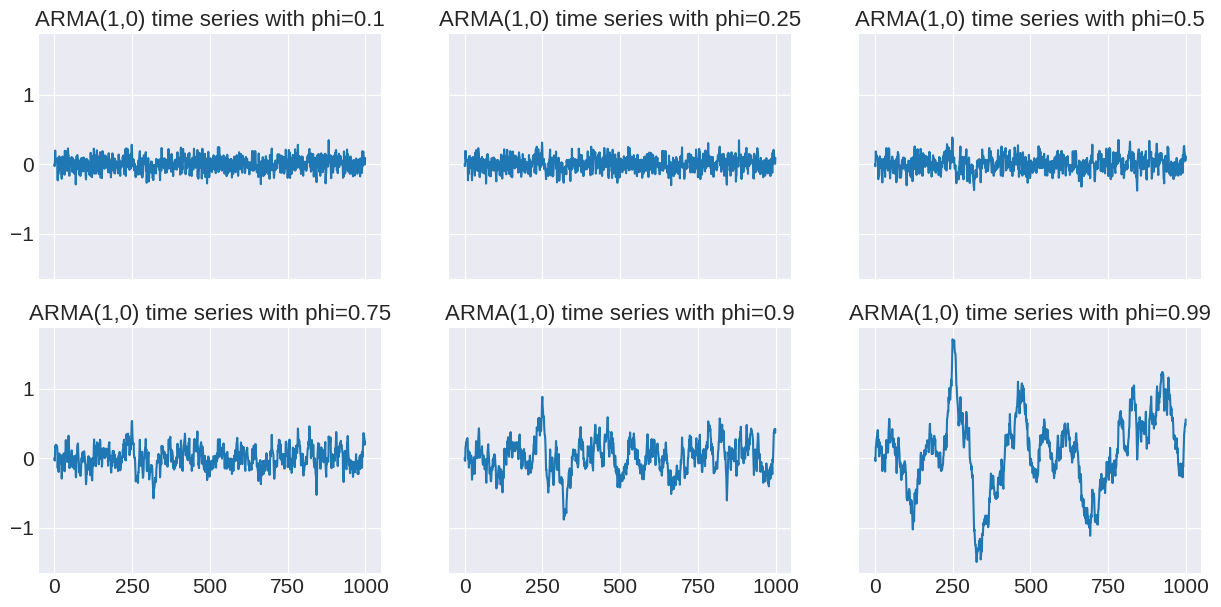

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(
    15, 7), sharex=True, sharey=True)

params = [1, 25, 5, 75, 9, 99]

for param in params:
    if params.index(param) < 3:
        axs[0, params.index(param)].plot(df.index, df[f'ARMA_1_0_0{param}_0'])
        axs[0, params.index(param)].tick_params(labelsize=15)
        axs[0, params.index(param)].set_title(
            f'ARMA(1,0) time series with phi=0.{param}', fontdict={'fontsize': 16})
    else:
        axs[1, (params.index(param)-3)].plot(df.index,
                                             df[f'ARMA_1_0_0{param}_0'])
        axs[1, (params.index(param)-3)].tick_params(labelsize=15)
        axs[1, (params.index(param)-3)
            ].set_title(f'ARMA(1,0) time series with phi=0.{param}', fontdict={'fontsize': 16})

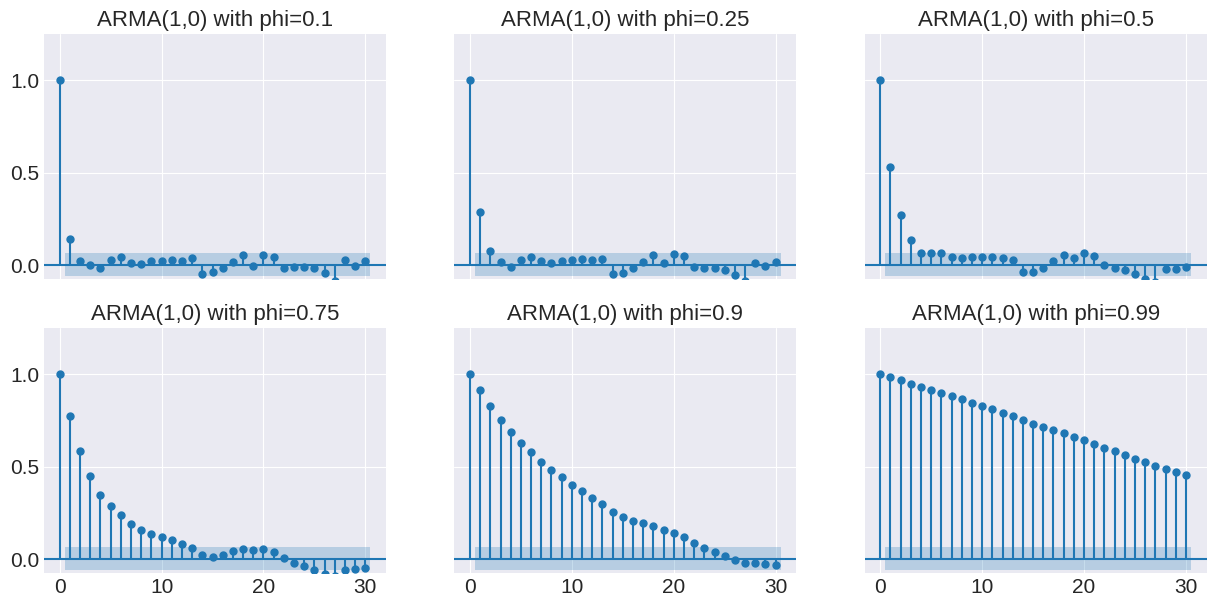

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(
    15, 7), sharex=True, sharey=True)

params = [1, 25, 5, 75, 9, 99]

for param in params:
    if params.index(param) < 3:
        sm.graphics.tsa.plot_acf(df[f'ARMA_1_0_0{param}_0'], lags=30, ax=axs[0, params.index(
            param)], bartlett_confint=False, auto_ylims=True)
        axs[0, params.index(param)].tick_params(labelsize=15)
        axs[0, params.index(param)].set_title(
            f'ARMA(1,0) with phi=0.{param}', fontdict={'fontsize': 16})
    else:
        sm.graphics.tsa.plot_acf(df[f'ARMA_1_0_0{param}_0'], lags=30, ax=axs[1, (params.index(
            param)-3)], bartlett_confint=False, auto_ylims=True)
        axs[1, (params.index(param)-3)].tick_params(labelsize=15)
        axs[1, (params.index(param)-3)
            ].set_title(f'ARMA(1,0) with phi=0.{param}', fontdict={'fontsize': 16})

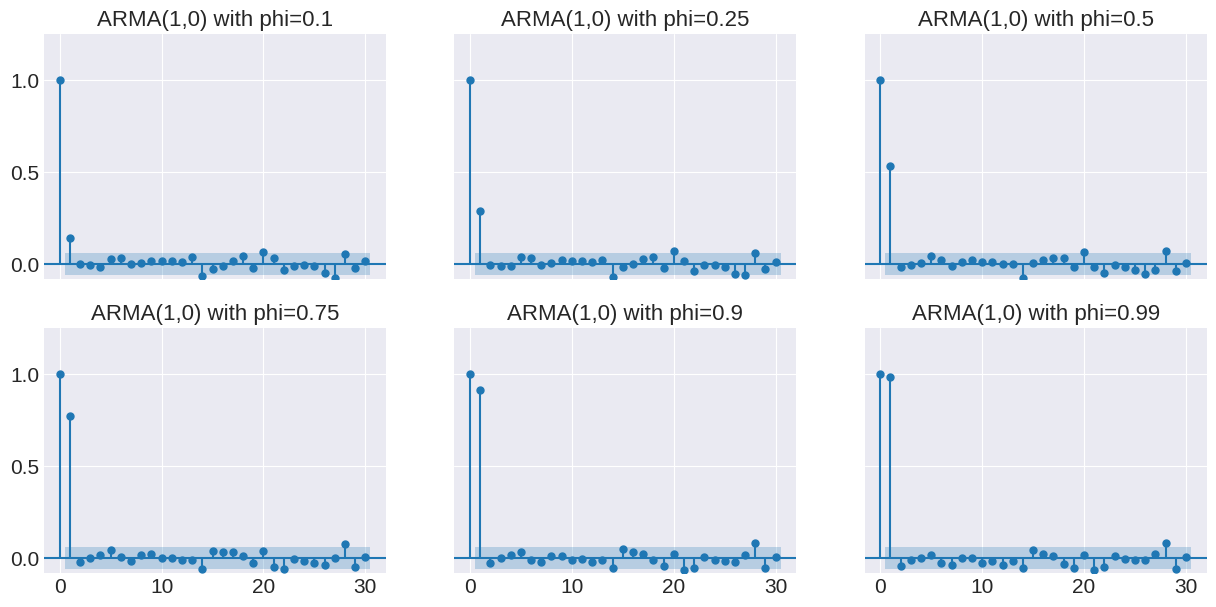

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(
    15, 7), sharex=True, sharey=True)

params = [1, 25, 5, 75, 9, 99]

for param in params:
    if params.index(param) < 3:
        sm.graphics.tsa.plot_pacf(
            df[f'ARMA_1_0_0{param}_0'], lags=30, ax=axs[0, params.index(param)], auto_ylims=True)
        axs[0, params.index(param)].tick_params(labelsize=15)
        axs[0, params.index(param)].set_title(
            f'ARMA(1,0) with phi=0.{param}', fontdict={'fontsize': 16})
    else:
        sm.graphics.tsa.plot_pacf(
            df[f'ARMA_1_0_0{param}_0'], lags=30, ax=axs[1, (params.index(param)-3)], auto_ylims=True)
        axs[1, (params.index(param)-3)].tick_params(labelsize=15)
        axs[1, (params.index(param)-3)
            ].set_title(f'ARMA(1,0) with phi=0.{param}', fontdict={'fontsize': 16})

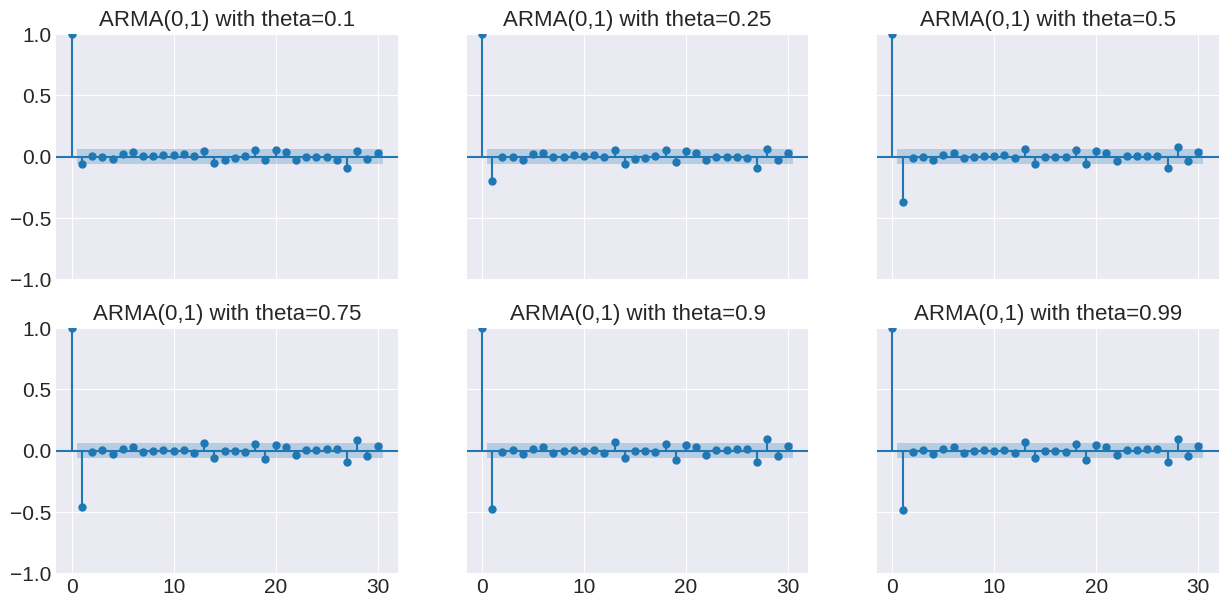

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(
    15, 7), sharex=True, sharey=True)

params = [1, 25, 5, 75, 9, 99]

for param in params:
    if params.index(param) < 3:
        sm.graphics.tsa.plot_acf(df[f'ARMA_0_1_0_0{param}'], lags=30, ax=axs[0, params.index(
            param)], bartlett_confint=False)
        axs[0, params.index(param)].tick_params(labelsize=15)
        axs[0, params.index(param)].set_title(
            f'ARMA(0,1) with theta=0.{param}', fontdict={'fontsize': 16})
    else:
        sm.graphics.tsa.plot_acf(df[f'ARMA_0_1_0_0{param}'], lags=30, ax=axs[1, (params.index(
            param)-3)], bartlett_confint=False)
        axs[1, (params.index(param)-3)].tick_params(labelsize=15)
        axs[1, (params.index(param)-3)
            ].set_title(f'ARMA(0,1) with theta=0.{param}', fontdict={'fontsize': 16})

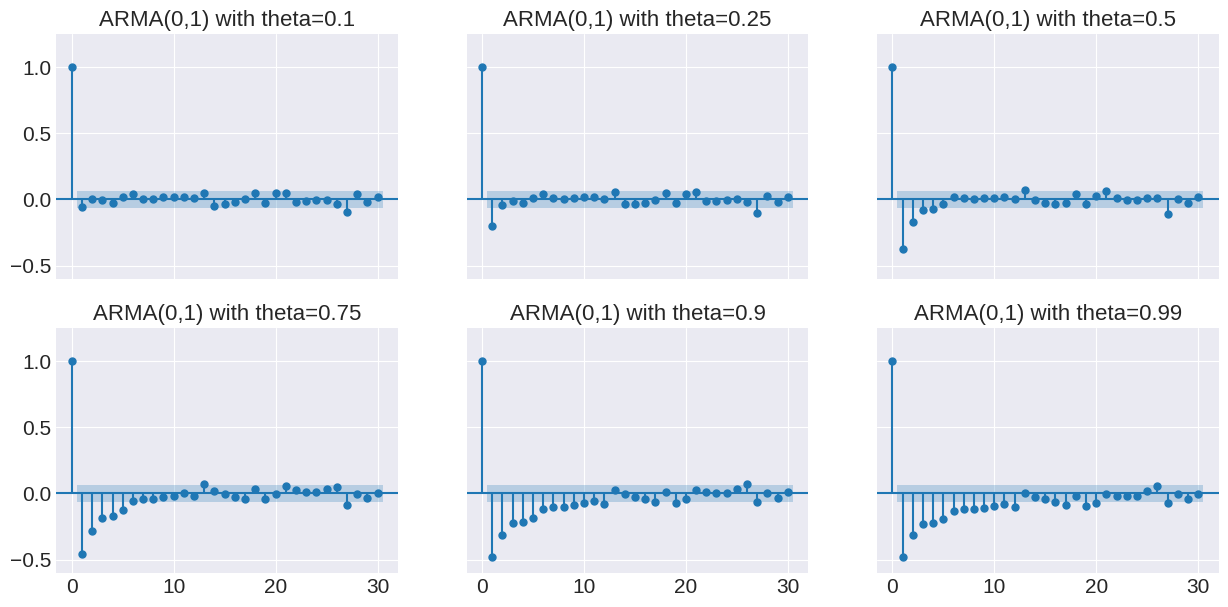

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(
    15, 7), sharex=True, sharey=True)

params = [1, 25, 5, 75, 9, 99]

for param in params:
    if params.index(param) < 3:
        sm.graphics.tsa.plot_pacf(df[f'ARMA_0_1_0_0{param}'], lags=30, ax=axs[0, params.index(
            param)], method='ywm', auto_ylims=True)
        axs[0, params.index(param)].tick_params(labelsize=15)
        axs[0, params.index(param)].set_title(
            f'ARMA(0,1) with theta=0.{param}', fontdict={'fontsize': 16})
    else:
        sm.graphics.tsa.plot_pacf(df[f'ARMA_0_1_0_0{param}'], lags=30, ax=axs[1, (params.index(
            param)-3)], method='ywm', auto_ylims=True)
        axs[1, (params.index(param)-3)].tick_params(labelsize=15)
        axs[1, (params.index(param)-3)
            ].set_title(f'ARMA(0,1) with theta=0.{param}', fontdict={'fontsize': 16})

In [ ]:
start_date = pd.to_datetime('1990-01-01')

end_date = pd.to_datetime('2023-08-26')

df = yf.download('AAPL', start=start_date,
                 end=end_date, interval="1d", auto_adjust=True)[['Close']]

df.index = pd.to_datetime(df.index)

[*********************100%***********************]  1 of 1 completed


In [ ]:
df['Log_Price'] = np.log(df['Close'])

df['price_dif'] = df['Log_Price'] - df['Log_Price'].shift(1)

df['price_dif2'] = df['price_dif'] - df['price_dif'].shift(1)

df.dropna(inplace=True)

In [ ]:
results_in_levels = adfuller(df['Log_Price'], autolag='AIC')

results_in_first_dif = adfuller(df['price_dif'], autolag='AIC')

results_in_second_dif = adfuller(df['price_dif2'], autolag='AIC')

print(
    f'The p-value of the ADF test on the prices in level, first difference and second difference are {results_in_levels[1]}, {results_in_first_dif[1]}, {results_in_second_dif[1]}')

The p-value of the ADF test on the prices in level, first difference and second difference are 0.9790946604463724, 0.0, 0.0


In [ ]:
import pandas as pd
import itertools

lags = range(0, 6)

lags_list = list(itertools.product(lags, repeat=2))

criterias = {}
models = {}

initial_iloc_to_forecast = df.index.get_loc(
    df.index[(df.index.year == 2021) & (df.index.month == 10)][0])

span = 250

df_results = pd.DataFrame(data=df[df.index >= df.index[initial_iloc_to_forecast]]
                          ['Close'], index=df[df.index >= df.index[initial_iloc_to_forecast]].index, columns = ['Close'])

df_results['forecast'] = 0.0

total_no_of_forecasts = (len(df)-initial_iloc_to_forecast)
forecast_span = range(total_no_of_forecasts)

In [ ]:
import pandas as pd
import statsmodels.api as sm
import itertools

dates = pd.date_range(start='2020-01-01', periods=500, freq='D')
close_prices = pd.Series(range(500), index=dates)
df = pd.DataFrame({'Close': close_prices})

print("DataFrame Index: ")
print(df.index)

if 'price_dif' not in df.columns:
    df['price_dif'] = df['Close'].diff().dropna()

lags = range(0, 6)

lags_list = list(itertools.product(lags, repeat=2))

criterias = {}
models = {}

desired_date = df.index[(df.index.year == 2021) & (df.index.month == 10)]
if len(desired_date) == 0:
    print("No data found for October 2021. Please check the available data.")
else:
    initial_iloc_to_forecast = df.index.get_loc(desired_date[0])
    span = 250
    df_results = pd.DataFrame(data=df[df.index >= df.index[initial_iloc_to_forecast]]['Close'],
                                  index=df[df.index >= df.index[initial_iloc_to_forecast]].index,
                                  columns=['Close'])
    df_results['forecast'] = 0.0
    total_no_of_forecasts = len(df) - initial_iloc_to_forecast
    for i in range(total_no_of_forecasts):
        for ar in lags:
            for ma in lags:
                if (ar == 0) and (ma == 0):
                    continue
                try:
                    models[f'ARMA_{ar}_{ma}'] = sm.tsa.ARIMA(
                        df['price_dif'].iloc[((i + initial_iloc_to_forecast) - span):(i + initial_iloc_to_forecast)],
                        order=(ar, 0, ma)
                    )

                    models[f'ARMA_{ar}_{ma}_res'] = models[f'ARMA_{ar}_{ma}'].fit()

                    criterias[f'ARMA_{ar}_{ma}'] = models[f'ARMA_{ar}_{ma}_res'].aic
                except Exception as e:
                    print(f"Model ARMA({ar},{ma}) could not be estimated: {e}")
                    criterias[f'ARMA_{ar}_{ma}'] = 1e+10

        best_arma = min(criterias, key=criterias.get)

        df_results.at[df_results.index[i], 'forecast'] = models[f'ARMA_{best_arma[5]}_{best_arma[7]}_res'].forecast(steps=1)

        criterias = {}
        models = {}

        print(f"forecast {i + 1} out of {total_no_of_forecasts} is {df_results['forecast'].iloc[i]}")

DataFrame Index: 
DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10',
               ...
               '2021-05-05', '2021-05-06', '2021-05-07', '2021-05-08',
               '2021-05-09', '2021-05-10', '2021-05-11', '2021-05-12',
               '2021-05-13', '2021-05-14'],
              dtype='datetime64[ns]', length=500, freq='D')
No data found for October 2021. Please check the available data.


In [ ]:
import pandas as pd
import numpy as np

dates = pd.date_range(start='2020-01-01', periods=500, freq='B')  # Business days
close_prices = np.random.rand(500) * 100  # Simulated closing prices
df = pd.DataFrame(data={'Close': close_prices}, index=dates)

initial_iloc_to_forecast = 0  # Adjust this based on your actual index
total_no_of_forecasts = 30  # Change this to your desired forecast horizon

df_results = pd.DataFrame(data=df['Close'].iloc[initial_iloc_to_forecast:initial_iloc_to_forecast + total_no_of_forecasts],
                          columns=['Close'])

df_results['forecast'] = 0.0  # Change this based on your forecasting logic

# Create the signal
df_results['signal'] = np.where(df_results['forecast'] >= 0.0, 1, -1)

# Create the Buy and Hold returns
df_results['returns'] = np.log(df_results['Close'] / df_results['Close'].shift(1))

# Create the Buy and Hold cumulative returns
df_results['Benchmark'] = df_results['returns'].cumsum()

# Create the strategy returns
df_results['Stra_cum_returns'] = (df_results['signal'] * df_results['returns']).cumsum()

# Display the results
print(df_results.head())

                Close  forecast  signal   returns  Benchmark  Stra_cum_returns
2020-01-01  99.121601       0.0       1       NaN        NaN               NaN
2020-01-02  24.404564       0.0       1 -1.401577  -1.401577         -1.401577
2020-01-03  56.844614       0.0       1  0.845551  -0.556026         -0.556026
2020-01-06  47.432370       0.0       1 -0.181017  -0.737042         -0.737042
2020-01-07  71.189604       0.0       1  0.406042  -0.331001         -0.331001


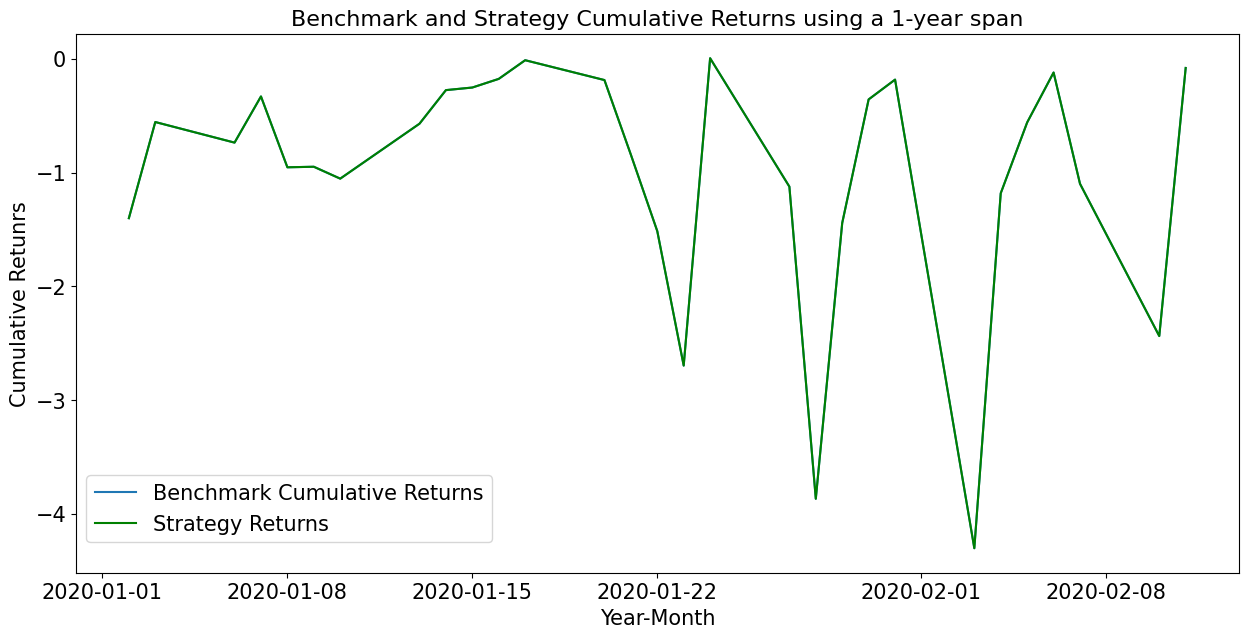

In [ ]:
# Set the figure size
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))

# Plot both the benchmark and strategy returns
plt.plot(df_results.index, df_results['Benchmark'], label = "Benchmark Cumulative Returns")
plt.plot(df_results.index, df_results['Stra_cum_returns'], label = "Strategy Returns", color='g')

# Set the title of the graph
plt.title('Benchmark and Strategy Cumulative Returns using a 1-year span', fontsize=16)

# Set the x- and y- axis labels and ticks sizes
plt.xlabel('Year-Month', fontsize=15)
plt.ylabel('Cumulative Retunrs', fontsize=15)
plt.tick_params(axis='both', labelsize=15)

# Set the plot legend location
plt.legend(loc=2, prop={'size': 15}, bbox_to_anchor=(0,0.2))

plt.show()